## Import Libraries

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('C:\python\Datasets\Social_Network_Ads.xlsx')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Data Cleaning

In [3]:
data=data.drop("User ID",axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data=data.replace({'Male':1,'Female':0})

In [6]:
X=data.iloc[:,:-1]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [7]:
Y=data.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Splitting the datasets into training and testing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

## Let's Scale the Data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Finding the value of K

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
error=[]
for i in range(1,40,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    error.append(1-accuracy_score(Y_test,Y_pred))

In [14]:
df=pd.DataFrame({"k":np.arange(1,40,2),'error':error})
df

,k,error
0,1,0.08
1,3,0.08
2,5,0.07
3,7,0.07
4,9,0.07
5,11,0.07
6,13,0.07
7,15,0.07
8,17,0.07
9,19,0.07


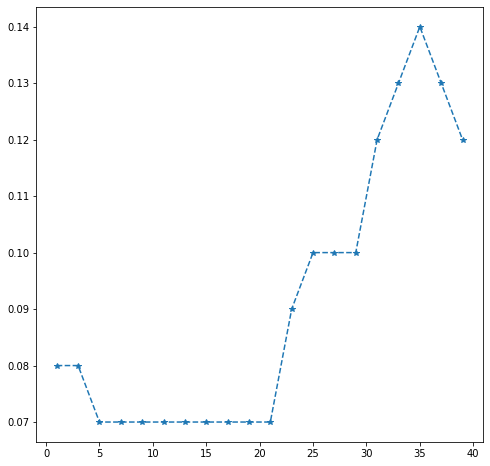

In [15]:
plt.figure(figsize=(8,8))
plt.plot(range(1,40,2),error,'--*')

In [16]:
df[df['error']==min(df['error'])]

,k,error
2,5,0.07
3,7,0.07
4,9,0.07
5,11,0.07
6,13,0.07
7,15,0.07
8,17,0.07
9,19,0.07
10,21,0.07


## Fitting the best model

In [17]:
model=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

## Prediction on test data

In [18]:
Y_pred=model.predict(X_test)
data=pd.DataFrame({'y_test':Y_test,'y_pred':Y_pred})
data

,y_test,y_pred
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,1
264,1,1


## Confusion matrix and accuracy score

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[65,  3],
       [ 5, 27]], dtype=int64)

In [21]:
acc=accuracy_score(Y_test,Y_pred)
acc

0.92